# Inverse kinematic in 2 dimension

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### N link robotic arm display

In [2]:
def DisplayNlinkarm(links, theta, alpha):
    #plot arm
    trasf=np.eye(4)
    x=[0]
    y=[0]
    z=[0]
    for i in range(len(links)):
        st=np.sin(theta[i])
        ct=np.cos(theta[i])
        sa=np.sin(alpha[i])
        ca=np.cos(alpha[i])
        new_trasf=[[ct, -ca*st, st*sa,  links[i]*(ct-ca*st)],
                   [st, ca*ct, -ca*sa,  links[i]*(st+ca*ct)],
                   [0,  sa,    ca,      sa*links[i]        ],
                   [0,  0,     0,       1                  ]]
        trasf=np.dot(trasf,new_trasf)
        x.append(np.dot(trasf,[0,0,0,1])[0])
        y.append(np.dot(trasf,[0,0,0,1])[1])
        z.append(np.dot(trasf,[0,0,0,1])[2])

    #plot in 3D space
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z') 
    print("x: ", x)
    print("y: ", y)
    print("z: ", z)
    plt.show()

x:  [0, 0.1339745962155614, 0.28469601695806757, 2.9330127018922174]
y:  [0, 2.2320508075688776, 3.645031754730549, 1.1519237886466844]
z:  [0, 1.7320508075688772, 5.729646071760522, 10.062177826491071]


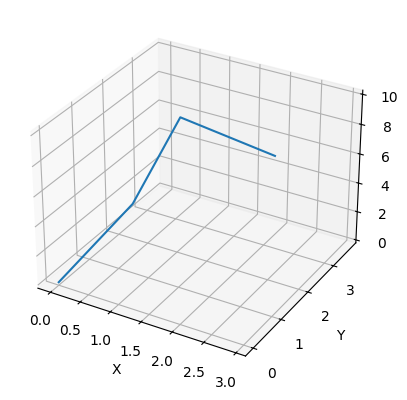

In [15]:
DisplayNlinkarm([2,3,4], [np.pi/3, np.pi/6, np.pi/3], [np.pi/3, np.pi/6, np.pi/3])

In [3]:
def compute_end_pos(links, theta, alpha):
    pos=np.array([0,0,0,1])
    for i in range(len(links)-1,-1,-1):
        st=np.sin(theta[i])
        ct=np.cos(theta[i])
        sa=np.sin(alpha[i])
        ca=np.cos(alpha[i])
        transf=[[ct, -ca*st, st*sa,  links[i]*(ct-ca*st)],
                   [st, ca*ct, -ca*sa,  links[i]*(st+ca*ct)],
                   [0,  sa,    ca,      sa*links[i]        ],
                   [0,  0,     0,       1                  ]]
        pos=np.dot(transf,pos)
    return pos[:3]

In [24]:
compute_end_pos([2,3,4], [np.pi/3, np.pi/6, np.pi/3], [np.pi/3, np.pi/6, np.pi/3])

array([ 2.9330127 ,  1.15192379, 10.06217783])

In [38]:
def PSO(links, target, pop_size, max_iter, w, c_soc, c_cog):
    #initialize
    dim=len(links)*2
    #theta=first half of the vector, alpha=second half
    pop=np.random.rand(pop_size,dim)*2*np.pi
    vel=np.zeros((pop_size,dim))
    pbest=pop.copy()
    pbest_fit=np.zeros(pop_size)
    gbest=pop[0].copy()
    gbest_fit=1e10
    gbest_history=[]

    #initialise pbest and gbest
    for i in range(pop_size):
        pos=compute_end_pos(links, pop[i][0:len(links)], pop[i][len(links):])
        pbest_fit[i]=np.linalg.norm(pos-target)
        if pbest_fit[i]<gbest_fit:
            gbest=pop[i].copy()
            gbest_fit=pbest_fit[i]

    #main loop
    it=0
    while it<max_iter:
        it+=1
        gbest_history.append(gbest.copy())
        for i in range(pop_size):
            end_pos = compute_end_pos(links, pop[i][0:len(links)], pop[i][len(links):])
            fit=np.linalg.norm(end_pos-target)

            if fit<pbest_fit[i]:
                pbest[i]=pop[i].copy()
                pbest_fit[i]=fit
                if fit<gbest_fit:
                    gbest=pop[i].copy()
                    gbest_fit=fit
                if fit<1e-3:
                    print(f"position: {end_pos}")
                    print(f"fit: {fit}")
                    print(f"best_pop: {pop[i]}")
                    print(f"gbest: {gbest}")
                    gbest_history.append(gbest.copy())
                    print(f"Solution found in {it} iteration :)")
                    return gbest_history, gbest
                
            vel[i]=w*vel[i]+c_soc*np.random.rand()*(gbest-pop[i])+c_cog*np.random.rand()*(pbest[i]-pop[i])
            pop[i]+=vel[i]      
            
    return gbest_history, gbest

## Test

### N link robotic arm

In [39]:
history, final_angles = PSO([2,3,4], [ 2.9330127 ,  1.15192379, 10.06217783], 100, 5000, 0.5, 1, 1)

position: [ 2.93287225  1.15275489 10.06266028]
fit: 0.0009711890859500679
best_pop: [4.11689414 0.951278   1.65571131 1.41605534 0.456489   4.44484834]
gbest: [4.11689414 0.951278   1.65571131 1.41605534 0.456489   4.44484834]
Solution found in 26 iteration :)


In [40]:
print(final_angles)

[4.11689414 0.951278   1.65571131 1.41605534 0.456489   4.44484834]


In [24]:
print( [np.pi/3, np.pi/6, np.pi/3])

[1.0471975511965976, 0.5235987755982988, 1.0471975511965976]


x:  [0, -0.8666470758101883, -1.1845249413152656, 2.932872251781988]
y:  [0, -1.8286442811676125, -2.003434683984915, 1.1527548881633822]
z:  [0, 1.9761029676974413, 6.138090484108087, 10.062660280392834]


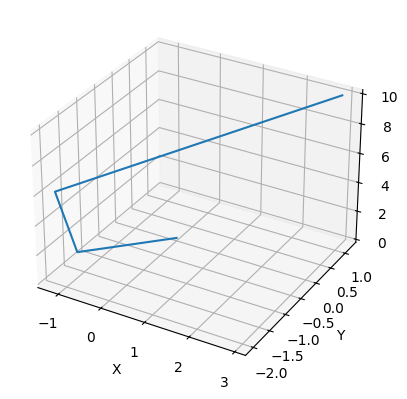

In [42]:
DisplayNlinkarm([2,3,4], final_angles[0:3], final_angles[3:6])

In [45]:
np.linalg.norm(compute_end_pos([2,3,4],final_angles[0:3], final_angles[3:6]) - np.array([ 2.9330127 ,  1.15192379, 10.06217783]))

0.0009711890859500679